In dieser Präsenzaufgabe sollen zwei Bilder analysiert werden. Diese müssen zunächst geladen werden. Ihr findet die Bilder im Moodle. Hier wird angenommen, dass die Bilder im selben Ordner liegen wie das Python Notebook. Andernfalls müssen die Pfade angepasst werden.

In [3]:
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

urban = imread('./urban.png')
glacier = imread('./glacier.png')

Zunächst werden die Bilder visualisiert. Das Bild `urban` zeigt einen Teil der Hamburger City. Das Bild `glacier` zeigt einen Ausschnitt der Rocky Mountains.

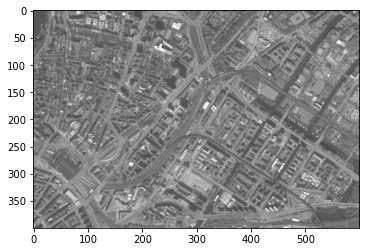

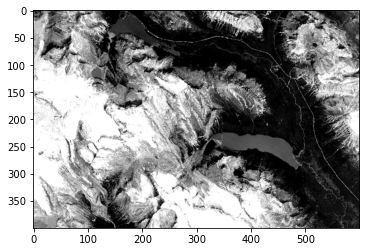

In [4]:
plt.figure(1)
plt.imshow(urban, cmap='gray', vmin=0, vmax=255)
plt.figure(2)
plt.imshow(glacier, cmap='gray', vmin=0, vmax=255)

Wie hoch sind die Mittelwerte beider Bilder? Kann man die offensichtlich sehr unterschiedlichen Bilder anhand ihrer Mittelwerte gut unterscheiden?

In [5]:
urbanMean = np.mean(urban)
glacierMean = np.mean(glacier)
print(urbanMean, glacierMean)

125.985725 123.6731375


Berechnet die Histogramme der beiden Bilder mit default-Parametern. Sind diese beiden Ergebnisse vergleichbar?

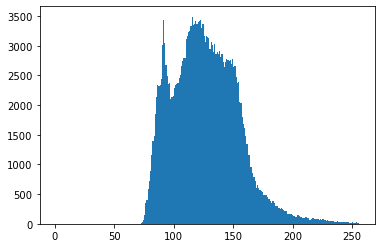

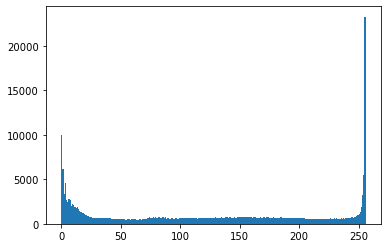

In [9]:
urbanHist = np.histogram(urban, bins=256, range=(0,256),density=False)
glacierHist = np.histogram(glacier, bins=256, range=(0,256),density=False)
plt.figure(1)
plt.hist(urban.flatten(),bins=256,range=(0,256),density=False)
plt.show()
plt.hist(glacier.flatten(),bins=256,range=(0,256),density=False)
plt.show()

Berechnet nun je ein Histogramm mit jeweils 8 Behältern pro Bild. Wie groß muss die `range` sein?

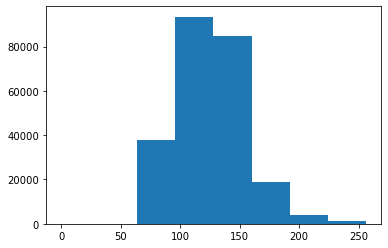

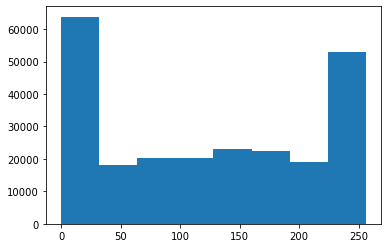

In [10]:
urbanHist = np.histogram(urban, bins=8, range=(0,256),density=False)
glacierHist = np.histogram(glacier, bins=8, range=(0,256),density=False)
plt.figure(1)
plt.hist(urban.flatten(),bins=8,range=(0,256),density=False)
plt.show()
plt.hist(glacier.flatten(),bins=8,range=(0,256),density=False)
plt.show()

Um einen besseren Überblick zu erhalten, sollen nun die Histogramme normiert werden. Lassen sich die Bilder nun gut unterscheiden?

(array([    0,     0, 37664, 93491, 84774, 19067,  3876,  1128]), array([  0.,  32.,  64.,  96., 128., 160., 192., 224., 256.]))
(array([0.        , 0.        , 0.15693333, 0.38954583, 0.353225  ,
       0.07944583, 0.01615   , 0.0047    ]), array([  0.,  32.,  64.,  96., 128., 160., 192., 224., 256.]))


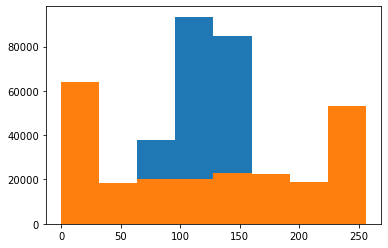

In [30]:
urbanHist = np.histogram(urban, bins=8, range=(0,256),density=False)
print(urbanHist)
urbanHistNorm = urbanHist[0]/(urban.shape[0]*urban.shape[1]), urbanHist[1]
print(urbanHistNorm)
glacierHist = np.histogram(glacier, bins=8, range=(0,256),density=False)
glacierHistNorm = glacierHist[0]/(glacier.shape[0]*glacier.shape[1]), glacierHist[1]
plt.figure(1)
#urban = urban/(urban.shape[0]*urban.shape[1])
plt.hist(urban.flatten(),bins=8,range=(0,256),density=False)
#plt.show()
#glacier = glacier/(glacier.shape[0]*glacier.shape[1])
plt.hist(glacier.flatten(),bins=8,range=(0,256),density=False)
plt.show()

Wie kann man zwei normierte Histogramme vergleichen?

In [24]:
np.mean(np.abs(urbanHistNorm-glacierHistNorm))

0.1587125

In [26]:
np.sum((urbanHistNorm-glacierHistNorm)**2)**.5

0.540037114175961